In [3]:
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 647.8 kB/s eta 0:00:00
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.9 MB 3.4 MB/s eta 0:00:04
    --------------------------------------- 0.2/10.9 MB 2.0 MB/s eta 0:00:06
    --------------------------------------- 0.2/10.9 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.4/10.9 MB 2.1 MB/s eta 0:00:06
   - -------------------------------------- 0.5/10.9 MB 2.1 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.9 MB 2.2 MB/s eta 0:00:05
   -- -----------------------------

In [1]:
import numpy as np
import pandas as pd
import string as s
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('bbc_data.csv')

In [3]:
df.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB
None


In [5]:
df['labels'].value_counts()

labels
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [6]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [7]:
from NLP import NLPProcessor

In [10]:
from nltk.stem import WordNetLemmatizer

In [14]:
def clean_function(Text):
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`]', ' ', Text)
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    Text = ' '.join([word for word in Text if word.lower() not in stop])
    wnl = WordNetLemmatizer()
    Text = ''.join([wnl.lemmatize(token) for token in Text])
    return Text

In [15]:
df['processed'] = df['data'].apply(lambda x: clean_function(x))
df

,data,labels,processed
0,Musicians to tackle US red tape Musicians gro...,entertainment,musicians tackle us red tape musicians groups ...
1,"U2s desire to be number one U2, who have won ...",entertainment,u2s desire number one u2 three prestigious gra...
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment,rocker doherty on-stage fight rock singer pete...
3,Snicket tops US box office chart The film ada...,entertainment,snicket tops us box office chart film adaptati...
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment,oceans twelve raids box office oceans twelve c...
...,...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech,warning windows word files writing microsoft w...
2221,Fast lifts rise into record books Two high-sp...,tech,fast lifts rise record books two high-speed li...
2222,Nintendo adds media playing to DS Nintendo is...,tech,nintendo adds media playing ds nintendo releas...
2223,Fast moving phone viruses appear Security fir...,tech,fast moving phone viruses appear security firm...


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
import random
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the text data to obtain the TF-IDF scores
tfidf = vectorizer.fit_transform(df['processed'])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=feature_names)



# Print related functions

# Print top k words per document
k = 4  # Set the number of top words to print

# Get 10 random document indices
random_indices = random.sample(range(len(df['processed'])), 10)

# Create an empty DataFrame to store the top k words per document along with labels
top_words_df = pd.DataFrame(columns=[f'Top_{i+1}_word' for i in range(k)] + ['Label'])

# Iterate over random documents
for i in random_indices:
    # Get the TF-IDF scores for the current document
    tfidf_scores = tfidf_df.iloc[i]
    # Get the indices of top k TF-IDF scores
    top_indices = tfidf_scores.argsort()[-k:][::-1]
    # Get the top k words based on TF-IDF scores
    top_words = [feature_names[idx] for idx in top_indices]
    # Append the top words and label to the DataFrame
    top_words_df.loc[f'Document {i+1}'] = top_words + [df.iloc[i]['labels']]


# Display the top k words per document based on TF-IDF scores along with labels in tabular format
print(top_words_df)

              Top_1_word Top_2_word  Top_3_word       Top_4_word  \
Document 1333   yachvili       half      france       twickenham   
Document 530     deficit     dollar     chinese        greenspan   
Document 1682   drinking      drunk       binge        mcconnell   
Document 11         film      voice     roberts       charlottes   
Document 450         gas   algerias      butane           dinars   
Document 1021   mcclaren   strikers     stewart        champions   
Document 597       yukos   deutsche  bankruptcy  yuganskneftegas   
Document 100    kosslick   festival       films         european   
Document 395      ebbers   sullivan          mr         worldcom   
Document 25    sensation      devon        soul            stone   

                       Label  
Document 1333          sport  
Document 530        business  
Document 1682       politics  
Document 11    entertainment  
Document 450        business  
Document 1021          sport  
Document 597        business  
Doc

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


# Split the dataset into training and testing sets
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(df['labels'])
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [37]:
X_test

,00,000,0001,000bn,000m,000s,000th,001,001and,001st,...,zornotza,zorro,zs,zubair,zuluaga,zurich,zurichs,zutons,zvonareva,zvyagintsev
414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
y_test

414          business
420          business
1644         politics
416          business
1232            sport
            ...      
741          business
205     entertainment
1102            sport
668          business
479          business
Name: labels, Length: 445, dtype: object

In [39]:
y_pred

array(['business', 'business', 'politics', 'business', 'sport',
       'politics', 'politics', 'sport', 'business', 'sport',
       'entertainment', 'business', 'politics', 'entertainment',
       'business', 'business', 'tech', 'business', 'entertainment',
       'business', 'entertainment', 'politics', 'entertainment',
       'business', 'entertainment', 'sport', 'business', 'politics',
       'sport', 'politics', 'politics', 'sport', 'tech', 'business',
       'politics', 'business', 'business', 'politics', 'tech', 'politics',
       'politics', 'sport', 'entertainment', 'politics', 'tech', 'tech',
       'tech', 'business', 'entertainment', 'tech', 'business',
       'business', 'sport', 'entertainment', 'business', 'sport', 'sport',
       'sport', 'politics', 'entertainment', 'entertainment', 'business',
       'business', 'entertainment', 'politics', 'business',
       'entertainment', 'entertainment', 'sport', 'politics', 'sport',
       'sport', 'tech', 'politics', 'entertainm

In [33]:
y_pred

array(['business', 'business', 'politics', 'business', 'sport',
       'politics', 'politics', 'sport', 'business', 'sport',
       'entertainment', 'business', 'politics', 'entertainment',
       'business', 'business', 'tech', 'business', 'entertainment',
       'business', 'entertainment', 'politics', 'entertainment',
       'business', 'entertainment', 'sport', 'business', 'politics',
       'sport', 'politics', 'politics', 'sport', 'tech', 'business',
       'politics', 'business', 'business', 'politics', 'tech', 'politics',
       'politics', 'sport', 'entertainment', 'politics', 'tech', 'tech',
       'tech', 'business', 'entertainment', 'tech', 'business',
       'business', 'sport', 'entertainment', 'business', 'sport', 'sport',
       'sport', 'politics', 'entertainment', 'entertainment', 'business',
       'business', 'entertainment', 'politics', 'business',
       'entertainment', 'entertainment', 'sport', 'politics', 'sport',
       'sport', 'tech', 'politics', 'entertainm

In [57]:
def confusion_mat(color):
    cof=confusion_matrix(y_test, y_pred)
    cof=pd.DataFrame(cof, index=[i for i in range(1,6)], columns=[i for i in range(1,6)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(5,5));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['1','2','3','4','5'],yticklabels=['1','2','3','4','5']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

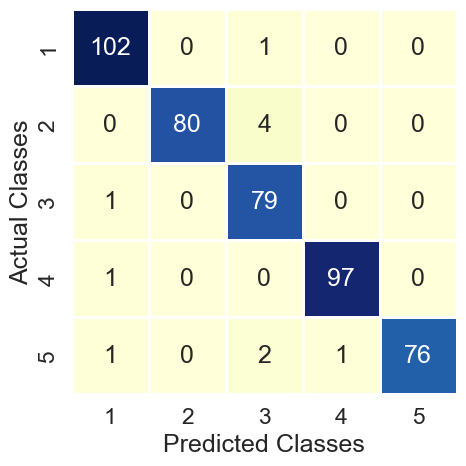

In [58]:
confusion_mat('YlGnBu')

In [59]:
def summary(Y_test,pred):
    print('\nClassification Report:\n', classification_report(Y_test, pred))
    # confusion_mat('YlGnBu')
    return round(accuracy_score(Y_test,pred)*100,3)

In [63]:
summary(y_test, y_pred)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       103
           1       1.00      0.95      0.98        84
           2       0.92      0.99      0.95        80
           3       0.99      0.99      0.99        98
           4       1.00      0.95      0.97        80

    accuracy                           0.98       445
   macro avg       0.98      0.97      0.97       445
weighted avg       0.98      0.98      0.98       445



97.528

In [65]:
y_pred

array([0, 0, 2, 0, 3, 2, 2, 3, 0, 3, 1, 0, 2, 1, 0, 0, 4, 0, 1, 0, 1, 2,
       1, 0, 1, 3, 0, 2, 3, 2, 2, 3, 4, 0, 2, 0, 0, 2, 4, 2, 2, 3, 1, 2,
       4, 4, 4, 0, 1, 4, 0, 0, 3, 1, 0, 3, 3, 3, 2, 1, 1, 0, 0, 1, 2, 0,
       1, 1, 3, 2, 3, 3, 4, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 3,
       0, 2, 3, 1, 3, 1, 2, 1, 0, 0, 1, 3, 1, 3, 4, 1, 3, 3, 2, 4, 0, 3,
       0, 2, 0, 1, 3, 0, 0, 0, 0, 3, 0, 3, 1, 3, 4, 4, 4, 0, 1, 0, 2, 0,
       0, 3, 2, 3, 1, 1, 0, 4, 4, 2, 3, 1, 4, 0, 4, 0, 1, 3, 2, 0, 0, 4,
       4, 2, 3, 0, 1, 0, 4, 0, 0, 3, 4, 0, 1, 4, 4, 0, 3, 2, 4, 0, 2, 4,
       3, 3, 0, 3, 3, 2, 1, 3, 4, 2, 0, 2, 4, 1, 1, 3, 0, 4, 4, 0, 3, 3,
       2, 4, 3, 0, 1, 4, 1, 3, 3, 3, 3, 2, 2, 3, 4, 0, 2, 3, 4, 4, 1, 4,
       1, 1, 1, 2, 3, 3, 3, 3, 1, 0, 2, 2, 0, 3, 4, 2, 0, 1, 4, 1, 2, 0,
       3, 2, 1, 1, 1, 1, 2, 1, 3, 2, 4, 1, 0, 2, 0, 2, 2, 2, 3, 4, 1, 0,
       0, 0, 3, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 3, 4, 1, 1, 4, 1, 0, 0, 4,
       3, 2, 0, 4, 1, 4, 1, 0, 3, 1, 1, 4, 0, 4, 2,

In [66]:
y_test

array([0, 0, 2, 0, 3, 2, 2, 3, 0, 3, 1, 0, 2, 1, 0, 0, 4, 0, 1, 0, 1, 2,
       1, 0, 1, 3, 0, 2, 3, 2, 2, 3, 4, 0, 1, 0, 0, 2, 4, 2, 4, 3, 1, 2,
       4, 4, 4, 0, 1, 4, 0, 0, 3, 1, 0, 3, 3, 3, 1, 1, 1, 0, 0, 1, 2, 0,
       1, 1, 3, 2, 3, 3, 4, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 3,
       0, 2, 3, 1, 3, 1, 2, 1, 0, 0, 1, 3, 1, 3, 4, 1, 3, 3, 2, 4, 0, 3,
       0, 4, 0, 1, 3, 3, 0, 0, 0, 3, 0, 3, 1, 3, 4, 4, 4, 0, 1, 0, 2, 0,
       0, 3, 2, 3, 1, 1, 0, 4, 4, 1, 3, 1, 4, 0, 4, 0, 1, 3, 2, 0, 0, 4,
       4, 2, 3, 0, 1, 0, 4, 0, 0, 3, 4, 0, 1, 4, 4, 0, 3, 2, 4, 0, 2, 4,
       3, 3, 0, 3, 3, 2, 1, 3, 4, 2, 0, 2, 4, 1, 1, 3, 0, 4, 4, 0, 3, 3,
       2, 4, 3, 0, 1, 4, 1, 3, 3, 3, 3, 2, 2, 3, 4, 0, 2, 3, 4, 4, 1, 4,
       1, 1, 1, 0, 3, 3, 3, 3, 1, 0, 2, 2, 0, 3, 4, 2, 0, 1, 4, 1, 2, 0,
       3, 2, 1, 1, 1, 1, 2, 1, 3, 2, 4, 1, 0, 2, 0, 2, 2, 2, 3, 4, 1, 0,
       2, 0, 3, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 3, 4, 1, 1, 4, 1, 0, 0, 4,
       3, 2, 0, 4, 1, 4, 1, 0, 3, 1, 1, 4, 0, 4, 2,

In [67]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(7, 5))
 
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
 
# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
 
# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()

ValueError: multiclass format is not supported

<Figure size 700x500 with 0 Axes>